<a href="https://colab.research.google.com/github/igor-stefan/disciplina_controle1_EE2021/blob/main/Projeto1_Controle1_20211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas necessárias

In [ ]:
!pip install control #comando para instalar a biblioteca control
import numpy as np #para trabalhar com números e funções entre números
import matplotlib.pyplot as plt #para gerar gráficos
import control as co #para utilizar as ferramentas de sistemas de controle
import scipy.signal as sps #para calcular o resíduo

#Definindo a função de transferência

In [ ]:
num = [-10, 0]; #coeficientes do numerador
den = [1, 3, 2]; #coeficientes do denominador
G1 = co.tf(num, den); #G1 armazena a função de transfrência do sistema
print("Função de transferência => ", G1); #mostra a função de transferência
[FP, R, K] = sps.residue(num, den); #calcula o resíduo da função de transferência e armazena em "FP"
print("Coeficientes frações parciais => ", FP); #mostra os resíduos

Função de transferência =>  
    -10 s
-------------
s^2 + 3 s + 2

Coeficientes frações parciais =>  [ 10. -20.]


#Resposta ao impulso no tempo




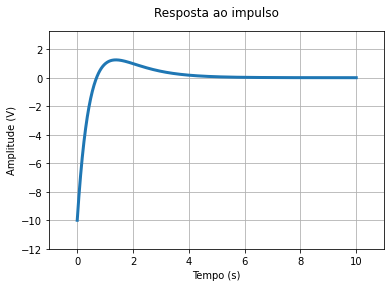

In [ ]:
t = np.linspace(0, 10, 1000) #cria um vetor t para a simulação com 1000 números entre [0 10[
t1, y1 = co.impulse_response(G1, t) #computa a resposta ao impulso (é passado como argumento o sistema e vetor para a simulação)
# a função de simulação retorna t1 que são os valores no eixo do tempo e y1 referente à amplitude
plt.plot(t1,y1, lw=3) #plota o gráfico
plt.title('Resposta ao impulso', pad = 15) #define o título com uma pequena margem do gráfico
plt.ylim(min(y1) - 2, max(y1) + 2) #configura limites de exibição para o eixo das ordenadas
plt.xlim(min(t1) - 1, max(t1) + 1) #configura limites de exibição para o eixo das abscissas
plt.xlabel('Tempo (s)', labelpad=4) #atribui nome ao eixo das abscissas
plt.ylabel('Amplitude (V)', labelpad=4) #atribui nome ao eixo das ordenads
plt.grid(1) #cria as linhas claras ao fundo

#Diagrama de pólos e zeros

Polos = [-2. -1.]
Zeros = [0.]


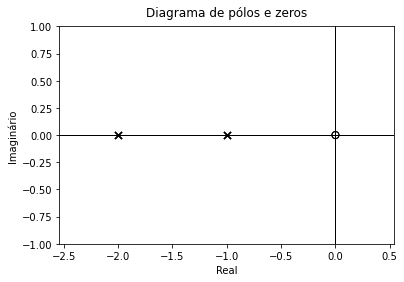

In [ ]:
polos, zeros = co.pzmap(G1) #função computa os pólos e zeros
print("Polos =", polos); #exibe os pólos retornados pela função
print("Zeros =", zeros); #exibe os zeros retornados pela função
plt.title("Diagrama de pólos e zeros", pad = 10) #adiciona título ao gráfico
plt.ylim(-1, 1); #configura limites de exibição das ordenadas
plt.xlim(-3, 1); #configura limites de exibção das abscissas
plt.ylabel('Imaginário'); #nome do eixo das ordenadas
plt.xlabel('Real'); #nome do eixo das abscissas
if len(polos) > 0: #verifica se há polos
            plt.scatter(np.real(polos), np.imag(polos), s = 50, marker='x', facecolors='k') #marca os pólos no gráfico
if len(zeros) > 0: #verifica se há zeros
            plt.scatter(np.real(zeros), np.imag(zeros), s = 50, marker='o', facecolors='none', edgecolors='k') #marca os zeros no gráfico

#Resposta ao degrau no tempo

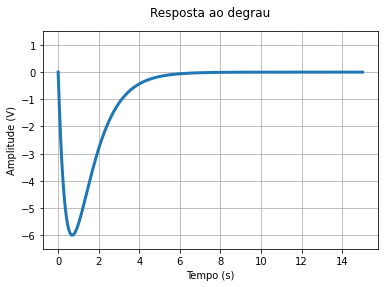

In [ ]:
p = np.linspace(0,15,1000) #cria vetor de 0 a 15 com 1000 números entre eles -> [0,15[
p1, y1 = co.step_response(G1, p) #computa a resposta ao degrau
A = 2.4 #definindo valor da amplitude
for i in range(len(y1)): 
  y1[i] *= A #multiplicando os valores da resposta ao degrau pela amplitude

plt.plot(p1,y1, lw=3) #gera o gráfico
plt.title('Resposta ao degrau', pad = 15) #define o título
plt.xlabel('Tempo (s)') #atribui nome ao eixo das abscissas
plt.ylabel('Amplitude (V)') #atribui nome ao eixo das ordenadas
plt.ylim(min(y1) - .5, max(y1) + 1.5) #configura exibição do eixo das ordenadas
plt.grid(1) #gera as linhas claras ao fundo marcando o grid